### 기본 설정  

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### 그래프에 사용될 글꼴의 크기 정의 및 한글 사용 설정

In [10]:
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.labelsize'] = 10
plt.rcParams["font.family"] = 'nanumgothic'
plt.rcParams['axes.unicode_minus'] = False

`save_fig()`: 생성되는 그래프를 `images` 폴더에 저장하는 함수

In [11]:
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### `RandomWalk` 클래스


In [13]:
import random
from random import choice

random.seed(72)

class RandomWalk:
    """랜덤 워크를 생성하는 클래스."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        
        # 모든 보행은 (0, 0)에서 시작.
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        """보행 내의 모든 점들을 계산."""
        # 보행이 원하는 길이에 도달할 때까지 계속 걷는다.
        while len(self.x_values) < self.num_points:

            # 어느 방향으로 갈 지, 얼마만큼 갈 지 결정.
            x_direction = choice([1, -1])  # 우측, 좌측
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance

            y_direction = choice([1, -1])  # 위, 아래
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance

            # 제자리인 이동은 무시하고 다시 방향을 결정한다.
            if x_step == 0 and y_step == 0:
                continue

            # 새 위치 계산.
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)

##### `RandomWalk` 클래스를 현재 폴더에 모듈(`random_walk.py`)로 저장한다.

#### 랜덤 워크 그리기

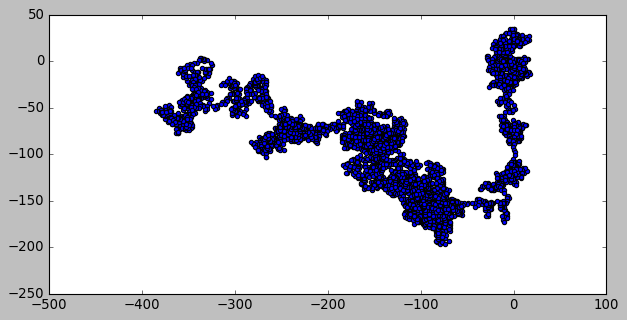

In [39]:
import random
from random_walk import RandomWalk

# random.seed(69)  # 테스트의 재현성을 위해 설정.

# 랜덤 워크 실행.
rw = RandomWalk()
rw.fill_walk()

# 보행 궤적 내의 점들 그리기.
plt.style.use('classic')
fig, ax = plt.subplots()
ax.scatter(rw.x_values, rw.y_values, s=15)
ax.set_aspect('equal')

save_fig("rw_visual_0_first_version")
plt.show()

### 랜덤 워크 플롯 스타일링
#### 포인트 칼라

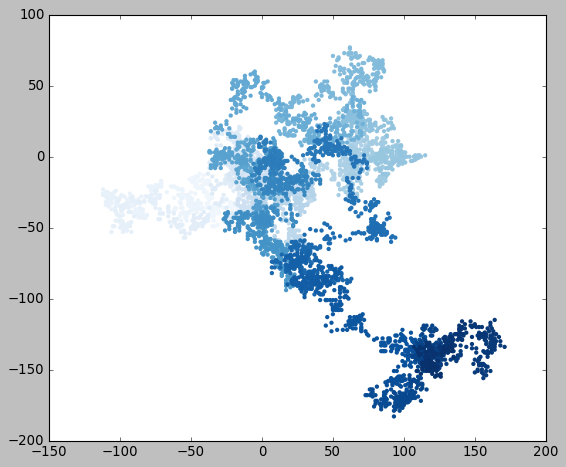

In [ ]:
import random
from random_walk import RandomWalk

# 랜덤 워크 실행.
rw = RandomWalk()
rw.fill_walk()

# 보행 궤적 내의 점들 그리기.
plt.style.use('classic')
fig, ax = plt.subplots()
point_numbers = range(rw.num_points)
ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
        edgecolors='none', s=15)
ax.set_aspect('equal')

save_fig("rw_visual_2_coloring_points")
plt.show()

#### 시작점과 종료점 표시하기

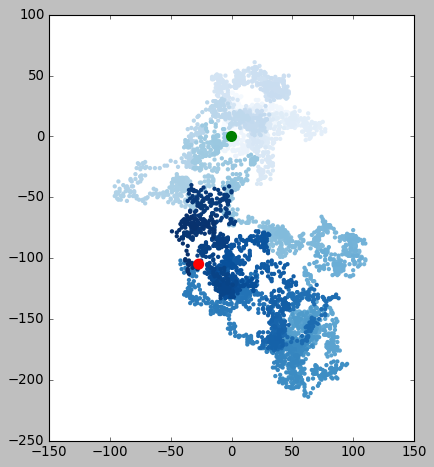

In [ ]:
import random
from random_walk import RandomWalk

# 랜덤 워크 실행.
rw = RandomWalk()
rw.fill_walk()

# 보행 궤적 내의 점들 그리기.
plt.style.use('classic')
fig, ax = plt.subplots()
point_numbers = range(rw.num_points)
ax.scatter(rw.x_values, rw.y_values, c=point_numbers, 
           cmap=plt.cm.Blues, edgecolors='none', s=15)
ax.set_aspect('equal')

# 시작점과 종료점을 강조.
ax.scatter(0, 0, c='green', edgecolors='none', s=100)
ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=100)

save_fig("rw_visual_3_starting_ending_points")
plt.show()

#### Axes 숨기기 

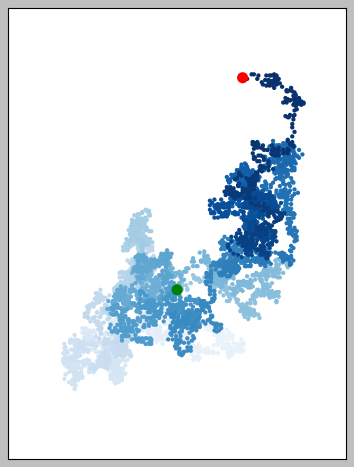

In [ ]:
import random
from random_walk import RandomWalk

# 랜덤 워크 실행.
rw = RandomWalk()
rw.fill_walk()

# 보행 궤적 내의 점들 그리기.
plt.style.use('classic')
fig, ax = plt.subplots()
point_numbers = range(rw.num_points)
ax.scatter(rw.x_values, rw.y_values, c=point_numbers, 
           cmap=plt.cm.Blues, edgecolors='none', s=15)
ax.set_aspect('equal')

# 시작점과 종료점을 강조.
ax.scatter(0, 0, c='green', edgecolors='none', s=100)
ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red',
           edgecolors='none', s=100)

# 축 지우기
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

save_fig("rw_visual_4_cleaning_axes")
plt.show()

#### 포인트 추가하기

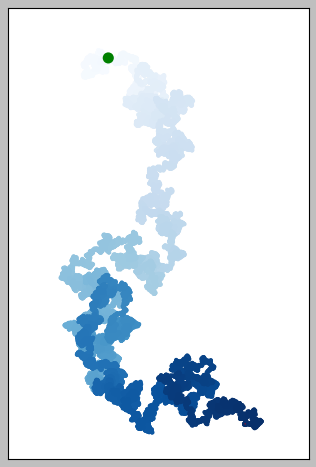

In [47]:
import random
from random_walk import RandomWalk

# 랜덤 워크 실행.
rw = RandomWalk(50_000)
rw.fill_walk()

# 보행 궤적 내의 점들 그리기.
plt.style.use('classic')
fig, ax = plt.subplots()
point_numbers = range(rw.num_points)
ax.scatter(rw.x_values, rw.y_values, c=point_numbers, 
           cmap=plt.cm.Blues, edgecolors='none', s=15)
ax.set_aspect('equal')

# 시작점과 종료점을 강조.
ax.scatter(0, 0, c='green', edgecolors='none', s=100)
ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red',
           edgecolors='none', s=1)

# 축 지우기
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

save_fig("rw_visual_5_adding_plot_points")
plt.show()

#### Figure 크기 및 해상도 지정
크기:

```python
fig, ax = plt.subplots(figsize=(15, 9))
plt.figure(figsize=(15, 9))
```
해상도:
```python
fig, ax = plt.subplots(figsize=(10, 6), dpi=128)
```

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
plt.figure(figsize=(15, 9))
fig, ax = plt.subplots(figsize=(10, 6), dpi=128)